In [155]:
import numpy as np                              
from astropy import coordinates                 
import astropy.units as u                      
from astropy.coordinates import SkyCoord        
from astropy.coordinates import Galactocentric
from astroquery.gaia import Gaia            
from astroquery.simbad import Simbad  
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
results

dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.0004484546653788734,1635721458409799680,Gaia DR2 4689639266844741376,4689639266844741376,1070568446,2015.5,6.021364258343517,0.07217160691330998,-72.08178171514578,0.05154886476600988,0.30301254853531556,0.07688668502438271,3.9410276,5.011712415282747,0.10512221464919902,-2.4191660996605404,0.11534111999287895,0.12406793,0.7231171,0.1054611,-0.19413611,0.25041035,-0.22637597,-0.49412376,-0.09060004,-0.018515091,-0.1327727,112,112,108,4,9.308463,301.32608,0.0561966669065007,0.9524177011353319,31,False,144.49774,1.5029653296671612,0.012460252381976273,-0.053136416,13,10,0.06792664,0,20,False,133,534922.4512953584,800.6103850095465,668.1433,11.367639,10,268340.34071749594,6402.201104568111,41.913765,11.779674,12,591877.4465254205,4934.314773983013,119.951294,10.331341,1.6081169,1,1.4483328,0.412035,1.0362978,--,--,0,--,--,--,NOT_AVAILABLE,305.89567136640295,-44.88873314103185,311.25075340566354,-62.352444106222215,102002,4777.0,4223.5,4959.99,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+4689639266844741376,
0.0021385899746595807,1635721458409799680,Gaia DR2 4689639468699960576,4689639468699960576,1285727079,2015.5,6.019316457186702,0.10645669526192235,-72.07951355616208,0.07711906041723383,0.5

In [157]:
myfile = "/Users/rebeccaceppas/Downloads/47tuc.dat" # define an output file name
# np.savetxt(myfile, np.transpose([ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error]),
#           header="ra  ra_error dec dec_error  pmra   pmra_error pmdec  pmdec_error  \n"+
#                  "deg mas      deg            mas/yr mas/yr     mas/yr mas/yr      ")

In [158]:
data = np.loadtxt(myfile)
print(data)

[[  6.208609   -72.29407465   5.45483302  -2.71775239]
 [  6.48363596 -71.94180446   5.50511184  -2.94486626]
 [  4.76773687 -72.03759867   5.4010517   -2.79022343]
 ...
 [  6.17945199 -72.22517327   5.71238586  -2.6222936 ]
 [  6.25211519 -72.05519687   5.97654485  -2.33479191]
 [  5.43602204 -71.84305377   5.75225901  -2.99479653]]


In [220]:
ra_deg,dec_deg,pmra_masyr,pmdec_masyr = np.loadtxt(myfile,unpack=True)

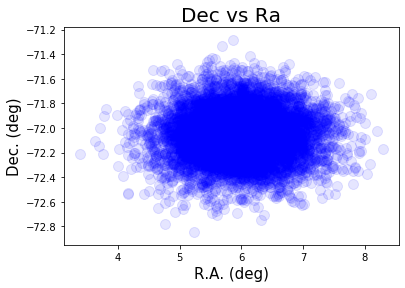

In [174]:
plt.scatter(ra_deg, dec_deg, s=100, color="blue", alpha=0.1)
plt.xlabel("R.A. (deg)",fontsize=15)
plt.ylabel("Dec. (deg)",fontsize=15)
plt.title("Dec vs Ra",fontsize=20)
plt.show()

### In the arguments, I have multiplied pmra_masyr and pmdec_masyr by (4.74) and (4.5) in order to get the proper motion in km/s.

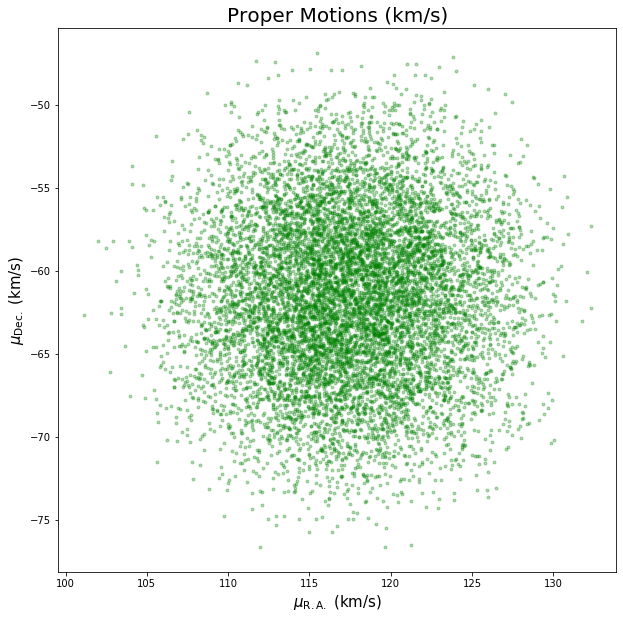

In [161]:
fig  = plt.figure(figsize=(10,10))

#plot in km/s
ax = fig.add_subplot(111)
ax.plot(pmra_masyr*4.5*4.74, pmdec_masyr*4.5*4.74, ".", color='green' ,alpha=0.3)
plt.xlabel("$\mu_\mathrm{R.A.}$ (km/s)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (km/s)",fontsize=15)
plt.title("Proper Motions (km/s)",fontsize=20)
plt.show()

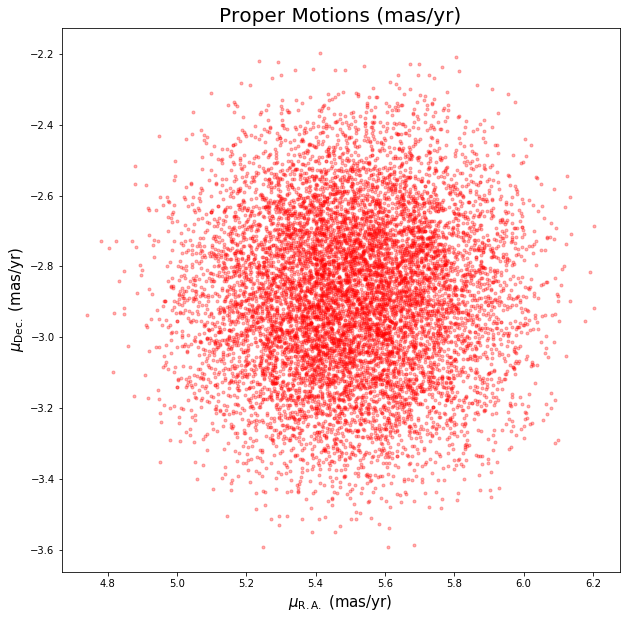

In [162]:
fig  = plt.figure(figsize=(10,10))

#plot in mas/yr
ax = fig.add_subplot(111)
ax.plot(pmra_masyr, pmdec_masyr, ".", color='red' ,alpha=0.3)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)
plt.title("Proper Motions (mas/yr)",fontsize=20)
plt.show()

In [163]:
rightAscension = np.mean(ra_deg)
print('Ra centre is: ' + str(rightAscension) + ' degrees')

declination = np.mean(dec_deg)
print('Dec centre is: ' + str(declination) + ' degrees')

properMotionRa = np.nanmean(pmra_masyr)
print('Velocity Ra is: ' + str(properMotionRa) + ' mas/yr')

properMotionDec = np.nanmean(pmdec_masyr)
print('Velocity Dec is: ' + str(properMotionDec) + ' mas/yr')

properMotionRaKms = np.nanmean(4.74*4.5*pmra_masyr)
print('Velocity Ra is: ' + str(properMotionRaKms) + ' km/s')

properMotionDecKms = np.nanmean(4.74*4.5*pmdec_masyr)
print('Velocity Dec is: ' + str(properMotionDecKms) + ' km/s')


Ra centre is: 5.981031233763009 degrees
Dec centre is: -72.0564269007876 degrees
Velocity Ra is: 5.5037609069979005 mas/yr
Velocity Dec is: -2.884917438078939 mas/yr
Velocity Ra is: 117.39522014626526 km/s
Velocity Dec is: -61.53528895422377 km/s


#### Now we compare these values to the results in Vasiliev 2019. There is no value for the popermotions in km/s, but we got those from a conversion, so if the proper motions in mas/yr match, these ones would too. In the same order, we have:

* 6.024 degrees
* -72.081 degrees
* 5.237 mas/yr
* -2.524 mas/yr

So we see how they mostly agree within some error bound that comes from the assumption that the center is the mean of the data. For the positions, they agree pretty well, because globular clusters are approximately spherically symmetrical.

### Coordinate transformation

In [208]:
#making the mean distance the origin 
transformCentreRa = ra_deg - 5.981031233763009
transformCentreDec = dec_deg + 72.0564269007876

#setting the velocity of the mean to be the reference point of v = 0
transformPmra = pmra_masyr - 5.5037609069979005
transformPmdec = pmdec_masyr + 2.884917438078939

#same transformation for proper motions but in km/s
transformPmra_kms = transformPmra*4.5*4.74
transformPmdec_kms = transformPmdec*4.5*4.74

print(transformCentreRa)

[ 0.22757777  0.50260472 -1.21329437 ...  0.19842075  0.27108396
 -0.5450092 ]


### Distance of Stars from origin in parsecs

In [202]:
#combining Ra and Dec to get total angular distance
angular_distance = np.sqrt((transformCentreRa*np.cos(transformCentreDec))**2 + transformCentreDec**2)

#transforming to angular distance in arsec so I can use the parallax formula to find distance in pc
angular_distance_radian = angular_distance*np.pi/180

print(angular_distance_radian)
print(angular_distance)

[0.00566621 0.00894122 0.02117478 ... 0.00450875 0.00473135 0.01001466]
[0.32465017 0.51229429 1.21322542 ... 0.25833241 0.27108654 0.57379759]


In [203]:
d_pc = angular_distance_radian*4.5e3
print(d_pc)

[25.49796482 40.23549907 95.28650191 ... 20.28938023 21.29108732
 45.06595709]


In [204]:
print(np.mean(d_pc))

38.67722126790859


In [205]:
v_kms = np.sqrt(transformPmra_kms**2 + transformPmdec_kms**2)

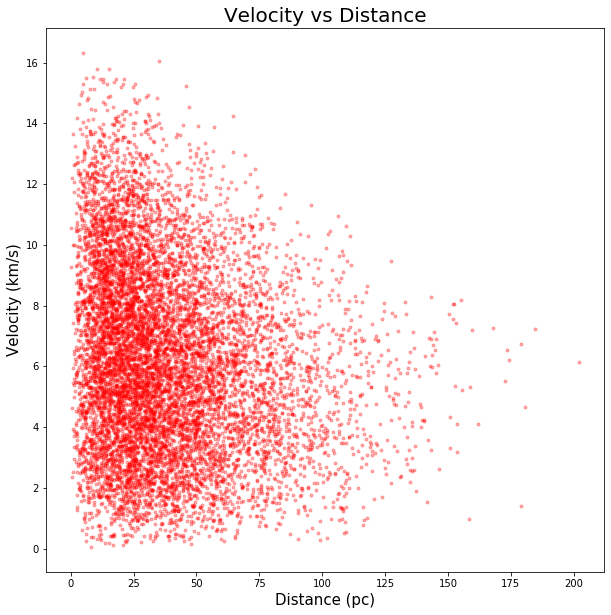

In [206]:
fig  = plt.figure(figsize=(10,10))

#plot in km/s vs pc
ax = fig.add_subplot(111)
ax.plot(d_pc, v_kms, ".", color='red' ,alpha=0.3)
plt.xlabel("Distance (pc)",fontsize=15)
plt.ylabel("Velocity (km/s)",fontsize=15)
plt.title("Velocity vs Distance",fontsize=20)
plt.show()

In [207]:
velocityDispersion = np.std(v_kms)
print(velocityDispersion)

3.030949154513045


## Repeating this for Keanu

In [223]:
myfile2 = "/Users/rebeccaceppas/Downloads/keanu.dat"

In [224]:
data2 = np.loadtxt(myfile2)

In [225]:
ra_deg,dec_deg,pmra_masyr,pmdec_masyr = np.loadtxt(myfile2,unpack=True)


In [229]:
rightAscension = np.mean(ra_deg)
print('Ra centre is: ' + str(rightAscension) + ' degrees')

declination = np.mean(dec_deg)
print('Dec centre is: ' + str(declination) + ' degrees')

properMotionRa = np.nanmean(pmra_masyr)
print('Velocity Ra is: ' + str(properMotionRa) + ' mas/yr')

properMotionDec = np.nanmean(pmdec_masyr)
print('Velocity Dec is: ' + str(properMotionDec) + ' mas/yr')

properMotionRaKms = np.nanmean(4.74*50*pmra_masyr)
print('Velocity Ra is: ' + str(properMotionRaKms) + ' km/s')

properMotionDecKms = np.nanmean(4.74*50*pmdec_masyr)
print('Velocity Dec is: ' + str(properMotionDecKms) + ' km/s')

Ra centre is: 78.76169750918672 degrees
Dec centre is: -69.02684096605364 degrees
Velocity Ra is: 1.8777708836086109 mas/yr
Velocity Dec is: 0.24873661754369214 mas/yr
Velocity Ra is: 445.0316994152408 km/s
Velocity Dec is: 58.950578357855036 km/s


In [230]:
#making the mean distance the origin 
transformCentreRa = ra_deg - 78.76169750918672
transformCentreDec = dec_deg + 69.02684096605364

#setting the velocity of the mean to be the reference point of v = 0
transformPmra = pmra_masyr - 1.8777708836086109
transformPmdec = pmdec_masyr - 0.24873661754369214

#same transformation for proper motions but in km/s
transformPmra_kms = transformPmra*50*4.74
transformPmdec_kms = transformPmdec*50*4.74

print(transformCentreRa)

[ 0.01183787 -0.1419426   0.01049669 ... -0.05983127  0.06177126
 -0.00686534]


In [231]:
#combining Ra and Dec to get total angular distance
angular_distance = np.sqrt((transformCentreRa*np.cos(transformCentreDec))**2 + transformCentreDec**2)

#transforming to angular distance in arsec so I can use the parallax formula to find distance in pc
angular_distance_radian = angular_distance*np.pi/180

print(angular_distance_radian)
print(angular_distance)

[0.00030362 0.00249491 0.00031023 ... 0.00108996 0.00110375 0.00037047]
[0.0173959  0.1429478  0.01777507 ... 0.06245033 0.06324006 0.02122612]


In [232]:
d_pc = angular_distance_radian*50e3
print(d_pc)

[ 15.18078317 124.74548776  15.51167647 ...  54.49819626  55.1873616
  18.52328221]


In [233]:
print(np.mean(d_pc))

49.69513441840921


In [234]:
v_kms = np.sqrt(transformPmra_kms**2 + transformPmdec_kms**2)

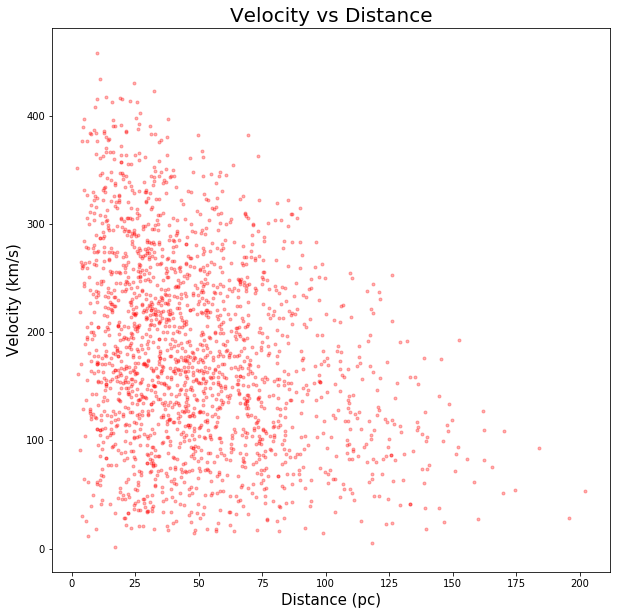

In [236]:
fig  = plt.figure(figsize=(10,10))

#plot in km/s vs pc
ax = fig.add_subplot(111)
ax.plot(d_pc, v_kms, ".", color='red' ,alpha=0.3)
plt.xlabel("Distance (pc)",fontsize=15)
plt.ylabel("Velocity (km/s)",fontsize=15)
plt.title("Velocity vs Distance",fontsize=20)
plt.show()

In [235]:
velocityDispersion = np.std(v_kms)
print(velocityDispersion)

89.19645282876796
